In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def normalize(array):
    '''对array作归一化处理'''
    return (array - array.min())/(array.max() - array.min())

In [3]:
'''重要噪声'''
#高斯噪声的PDF
def guass_PDF(z):
    mean = np.mean(z)
    sigma = np.std(z)   #计算标准差
    guass = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-((z-mean)**2)/(2*(sigma**2)))

    return guass

#给图像添加高斯噪声
def add_guassian_noise(img, mean = 0, sigma = 0.1):
    '''给图像添加高斯噪声
    img:输入图像
    mean:噪声均值
    sigma:噪声标准差
    '''
    imag = np.array(img,dtype= float)
    noise = np.random.normal(mean,sigma,imag.shape)
    imag_out = imag + noise
    imag_out = np.uint8(normalize(imag_out)*255)

    return imag_out

#瑞利噪声的PDF
def rayleigh_PDF(z,a=3,b=2):
    assert b != 0 #断言语句，不符合条件直接抛出错误
    P = 2/b*(z-a)*np.exp(-((z-a)**2)/b)
    P = np.where(z<a, P , 0)
    
    return P

#给图像添加瑞利噪声
def add_rayleigh_noise(img, scale = 3):
    '''给图像添加瑞利噪声
    img:输入图像
    scale:初始为3
    '''
    imag = np.array(img, dtype=float)
    noise = np.random.rayleigh(scale, size = imag.shape)
    imag_out = imag+noise
    imag_out = np.uint8(normalize(imag_out)*255)

    return imag_out

#爱尔兰噪声的PDF
def ireland_PDF(z,a = 2, b = 1):
    ireland = ((a**b)*(z**(b-1)))/math.factorial(b-1)*np.exp(-a*z)
    ireland = np.where(z < 0, ireland , 0)

    return ireland

#给图像添加爱尔兰噪声
def add_ireland_noise(img,scale = 1):
    '''给图像添加爱尔兰（伽马）噪声
    img:输入图像
    scale:初始为1
    '''
    imag = np.array(img ,dtype=float)

    noise = np.random.gamma(shape=1,scale=scale,size = imag.shape)
    imag_out = imag+noise
    imag_out = np.uint8(normalize(imag_out)*255)

    return imag_out

#指数噪声的PDF
def exp_PDF(z , a =1):
    exp = a*np.e**(-a*z)
    exp = np.where(z<0, exp , 0)

    return exp

#给图像添加指数噪声
def add_exp_noise(img , scale = 1):
    '''给图像指数噪声
    img:输入图像
    scale:初始为1
    '''
    imag = np.array(img,dtype=float)
    noise = np.random.exponential(scale = scale,size = imag.shape)

    imag_out = imag + noise
    imag_out = np.uint8(normalize(imag_out)*255)

    return imag_out

#均匀噪声PDF
def average_PDF(z,a=1,b=2):
    assert b>a
    average = 1/(b-a)
    average = np.where(z<a,average,0)
    average = np.where(z>b,average,0)
    return average

#给图像添加均匀噪声
def add_average_noise(img, mean=0, sigma=800):
    '''给图像指数噪声
    img:输入图像
    mean均值初始为0
    sigma标准差初始为800
    '''
    imag = np.array(img,dtype=float)
    a = 2*mean - np.sqrt(12*sigma)
    b = 2*mean + np.sqrt(12*sigma)

    noise = np.random.uniform(a,b,imag.shape)
    imag_out = imag+noise
    imag_out = np.uint8(normalize(imag_out)*255)

    return imag_out

#椒盐噪声的PDF
def salt_pepper_PDF(ps = 0.1, pp = 0.1):
    salt_pepper = np.zeros([3])
    salt_pepper[0] = ps
    salt_pepper[2] = pp
    salt_pepper[1] = 1 - (ps + pp)
    return salt_pepper 

#给图像添加椒盐噪声
def add_salt_pepper_noise(img,ps = 0.01, pp =0.01):
    '''给图像椒盐噪声
    img:输入图像
    ps:盐噪声的概率
    pp:椒噪声的概率
    '''
    h , w = img.shape[:2]
    mask = np.random.choice((0,0.5,1),size=(h,w),p = [pp,(1-ps-pp),ps])
    img_out = img.copy()
    img_out[mask==1] = 255
    img_out[mask==0] = 0
    
    return img_out

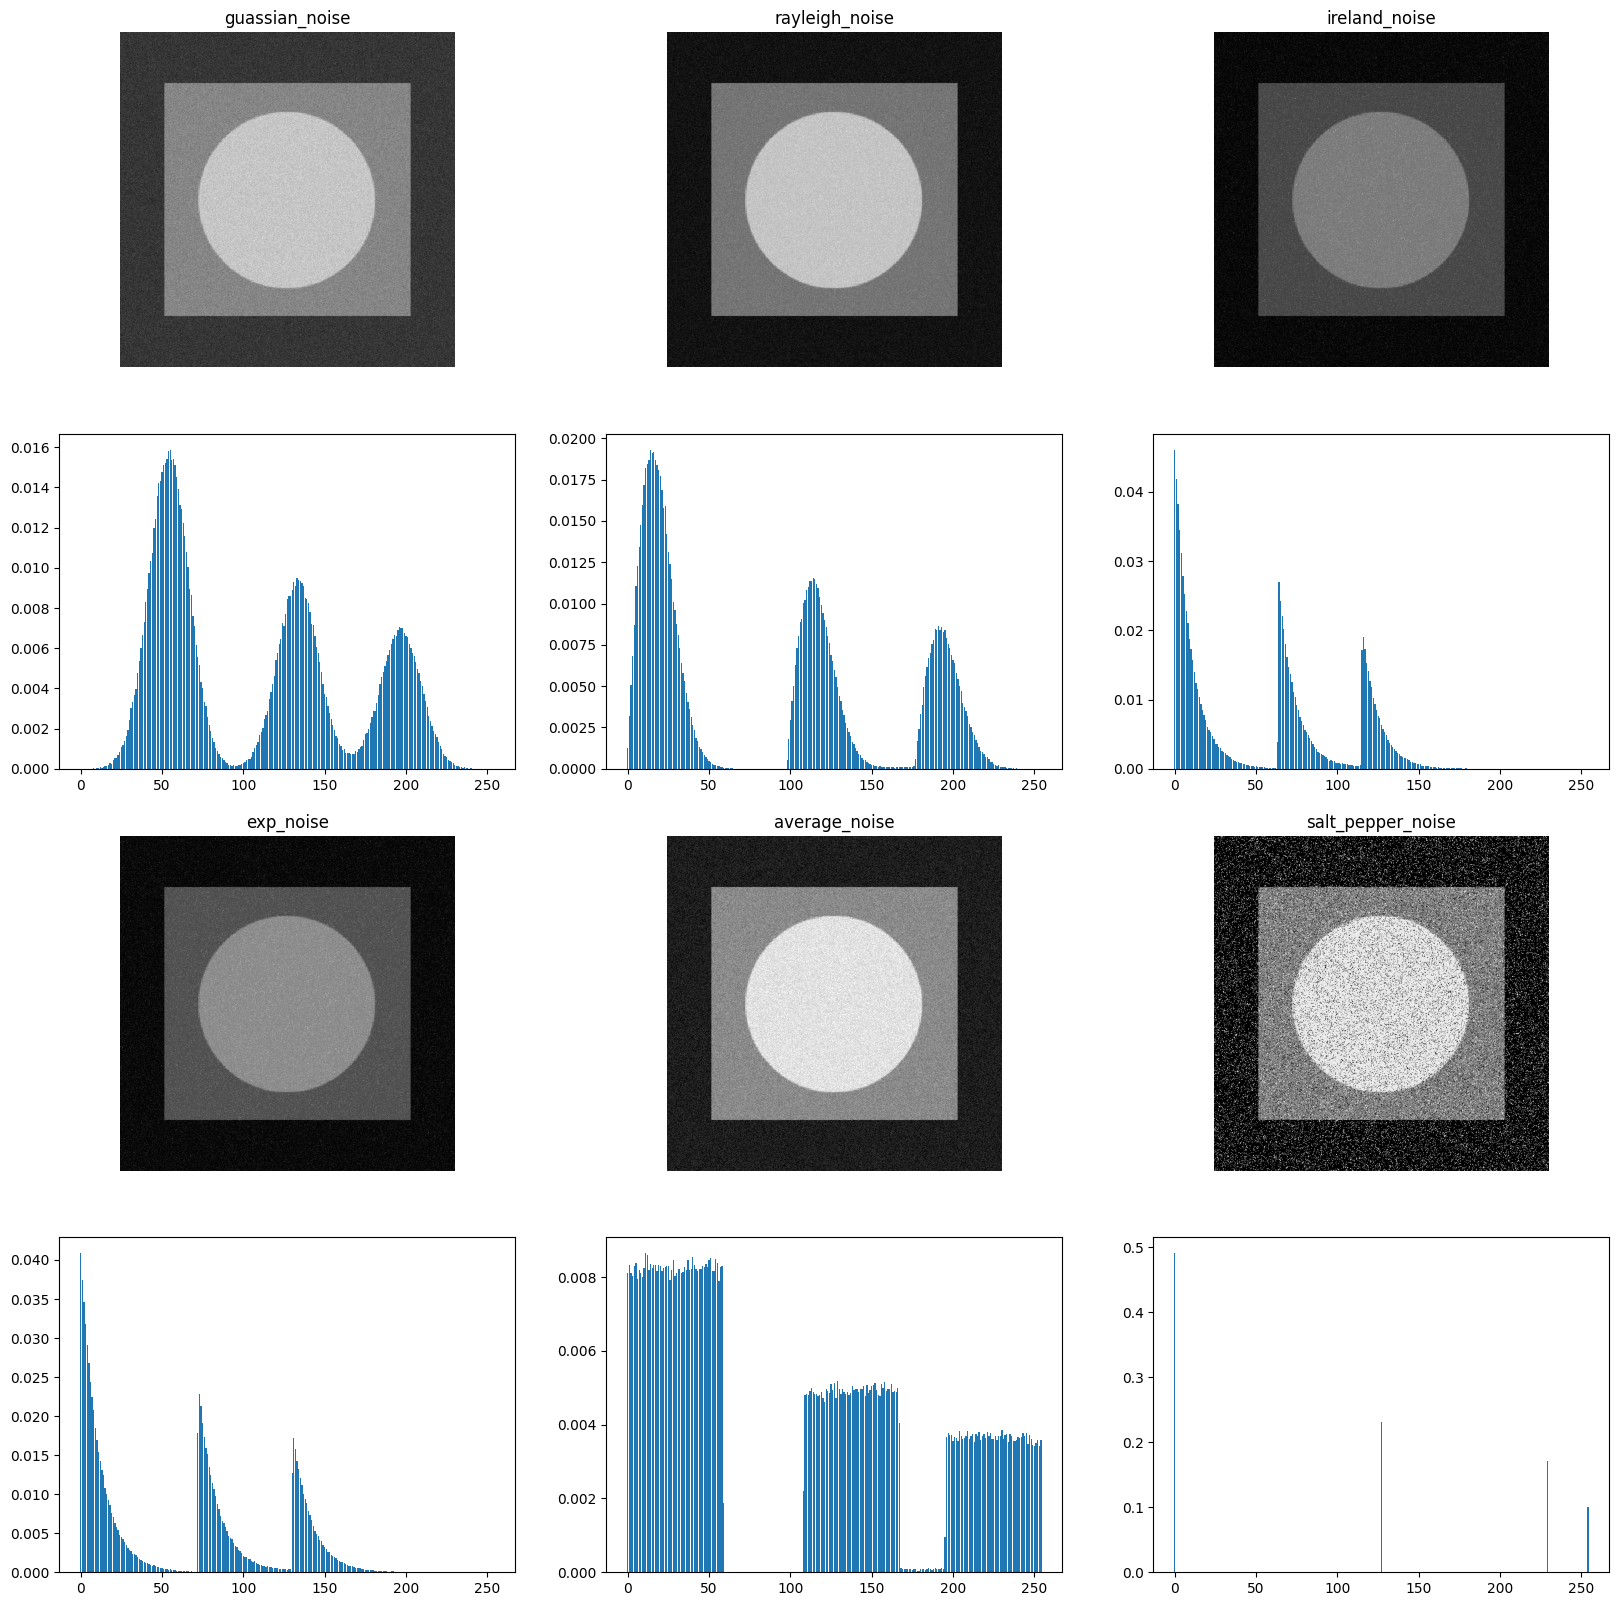

In [4]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\test-pattern.tif",0)
img_gauss = add_guassian_noise(img_ori, mean=0, sigma=20) #添加高斯噪声的图像
img_ray = add_rayleigh_noise(img_ori,scale = 20) #添加瑞利噪声的图像
img_ireland = add_ireland_noise(img_ori,scale=20) #添加爱尔兰噪声的图像
img_exp = add_exp_noise(img_ori,scale = 20) #添加指数噪声的图像
img_ave = add_average_noise(img_ori,mean = 0,sigma=100) #添加均匀噪声的图像
img_sp = add_salt_pepper_noise(img_ori,pp = 0.1,ps=0.1)
hist1, bins = np.histogram(img_gauss.flatten(),bins=255,range=[0,255],density=True)
hist2, bins = np.histogram(img_ray.flatten(),bins=255,range=[0,255],density=True)
hist3, bins = np.histogram(img_ireland.flatten(),bins=255,range=[0,255],density=True)
hist4, bins = np.histogram(img_exp.flatten(),bins=255,range=[0,255],density=True)
hist5, bins = np.histogram(img_ave.flatten(),bins=255,range=[0,255],density=True)
hist6, bins = np.histogram(img_sp.flatten(),bins=255,range=[0,255],density=True)
plt.figure(figsize=(20,20))
plt.subplot(431),plt.title('guassian_noise'),plt.imshow(img_gauss,'gray'),plt.axis('off')
plt.subplot(434),plt.bar(bins[:-1], hist1[:])
plt.subplot(432),plt.title('rayleigh_noise'),plt.imshow(img_ray,'gray'),plt.axis('off')
plt.subplot(435),plt.bar(bins[:-1], hist2[:])
plt.subplot(433),plt.title('ireland_noise'),plt.imshow(img_ireland,'gray'),plt.axis('off')
plt.subplot(436),plt.bar(bins[:-1], hist3[:])
plt.subplot(437),plt.title('exp_noise'),plt.imshow(img_exp,'gray'),plt.axis('off')
plt.subplot(4,3,10),plt.bar(bins[:-1], hist4[:])
plt.subplot(4,3,8),plt.title('average_noise'),plt.imshow(img_ave,'gray'),plt.axis('off')
plt.subplot(4,3,11),plt.bar(bins[:-1], hist5[:])
plt.subplot(439),plt.title('salt_pepper_noise'),plt.imshow(img_sp,'gray'),plt.axis('off')
plt.subplot(4,3,12),plt.bar(bins[:-1], hist6[:])
plt.show()

In [5]:
'''均值滤波器'''
#算术平均滤波器
def arithmentic_mean(image,shape):
    '''算术平均滤波器
    image:输入图像
    shape:滤波器大小，为一个元组形式(height,weidth)'''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge')   #对图像边界进行填充
    image_mean = image.copy()
    for i in range(padding_h,img_h+padding_h):
        for j in range(padding_w,img_w+padding_w):
            sum = np.sum(image_pad[i-padding_h:i+padding_h+1,j-padding_w:j+padding_w+1]*1.0) #乘上1.0转换为浮点数
            image_mean[i - padding_h][j - padding_w] = 1/(m * n) * sum   #将均值作用于中心像素点上
    return image_mean

#几何均值滤波器
def geometric_mean(image, shape):
    '''几何均值滤波器
    image:输入图像
    shape:滤波器大小，为一个元组形式(height,weidth)'''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_mean = image.copy()
    for i in range(padding_h, img_h + padding_h):
        for j in range(padding_w, img_w + padding_w):
            prod = np.prod(image_pad[i-padding_h:i+padding_h+1, j-padding_w:j+padding_w+1]*1.0) #乘上1.0转换为浮点数
            image_mean[i - padding_h][j - padding_w] = np.power(prod, 1/m/n)  #将均值作用于中心像素点上

    return image_mean

#谐波平均滤波器（调和平均）
def harmonic_mean(image,shape):
    '''调和平均滤波器
    image:输入图像
    shape:滤波器大小，为一个元组形式(height,weidth)'''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_mean = image.copy()
    for i in range(padding_h, img_h + padding_h):
        for j in range(padding_w, img_w + padding_w):
            temp = np.sum(1 / (image_pad[i-padding_h:i+padding_h+1, j-padding_w:j+padding_w+1]*1.0 + (1e-8)))   #加上1e-8防止分母为0
            image_mean[i - padding_h][j - padding_w] = m*n / temp   

    return image_mean

#反谐波平均滤波器
def antiharmonic_mean(image,shape,Q = 0):
    '''反调和平均滤波器
    image:输入图像
    shape:滤波器大小，为一个元组形式(height,weidth)
    Q:默认为0,Q>0,像素越大其权重越大;Q<0,像素越大其权重越小'''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_mean = image.copy()
    for i in range(padding_h, img_h + padding_h):
        for j in range(padding_w, img_w + padding_w):
            temp = image_pad[i-padding_h:i+padding_h+1, j-padding_w:j+padding_w+1] * 1.0 + (1e-8)
            image_mean[i - padding_h][j - padding_w] = np.sum(np.power(temp, (Q+1))) / np.sum(np.power(temp, Q) + (1e-8))

    return image_mean

'''统计排序滤波器'''
#中值滤波器
def median_filter(image,shape):
    '''中值滤波器
    image:输入图像
    shape:滤波器大小，为一个二元组形式
    '''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_median = image.copy()
    for i in range(img_h):
        for j in range(img_w):
            square = image_pad[i:i+m,j:j+n]
            image_median[i,j]=np.median(square)
    
    return image_median

#最大值滤波器
def max_filter(image,shape):
    '''最大值滤波器
    image:输入图像
    shape:滤波器大小，为一个二元组形式
    '''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_max = image.copy()
    for i in range(img_h):
        for j in range(img_w):
            square = image_pad[i:i+m,j:j+n]
            image_max[i,j]=np.max(square)
    
    return image_max

#最小值滤波器
def min_filter(image,shape):
    '''最小值滤波器
    image:输入图像
    shape:滤波器大小，为一个二元组形式
    '''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_min = image.copy()
    for i in range(img_h):
        for j in range(img_w):
            square = image_pad[i:i+m,j:j+n]
            image_min[i,j]=np.min(square)
    
    return image_min

#中点滤波器
def middle_filter(image,shape):
    '''中点滤波器
    image:输入图像
    shape:滤波器大小，为一个二元组形式
    '''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_middle = image.copy()
    for i in range(img_h):
        for j in range(img_w):
            square = image_pad[i:i+m,j:j+n]
            image_middle[i,j]=int((square.min()+square.max())/2)
    
    return image_middle

#修正阿尔法滤波器
def modified_alpha_filter(image,shape,alpha=0):
    '''修正阿尔法滤波器
    image：输入图像
    shape滤波器大小
    alpha：删除alpha/2个最大灰度，alpha/2个最小灰度'''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_alpha = image.copy()
    for i in range(img_h):
        for j in range(img_w):
            square = image_pad[i:i+m,j:j+n]
            sort = np.sort(square.flatten())   #根据灰度值排序
            ret = np.sum(sort[int(alpha/2):m*n-int(alpha/2)])  #删除alpha/2个最大灰度，alpha/2个最小灰度
            image_alpha[i,j] = (np.sum(ret))/(m*n-alpha)

    return image_alpha

In [6]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-gaussian.tif",0) #读取被高斯噪声污染的图像
img_am = arithmentic_mean(img_ori,(3,3))
img_gm = geometric_mean(img_ori,(3,3))
img_psn = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-pepper.tif",0) #读取被椒噪声污染的图像
img_hm = harmonic_mean(img_psn,(3,3))
img_ahm = antiharmonic_mean(img_psn,(3,3),1.5)



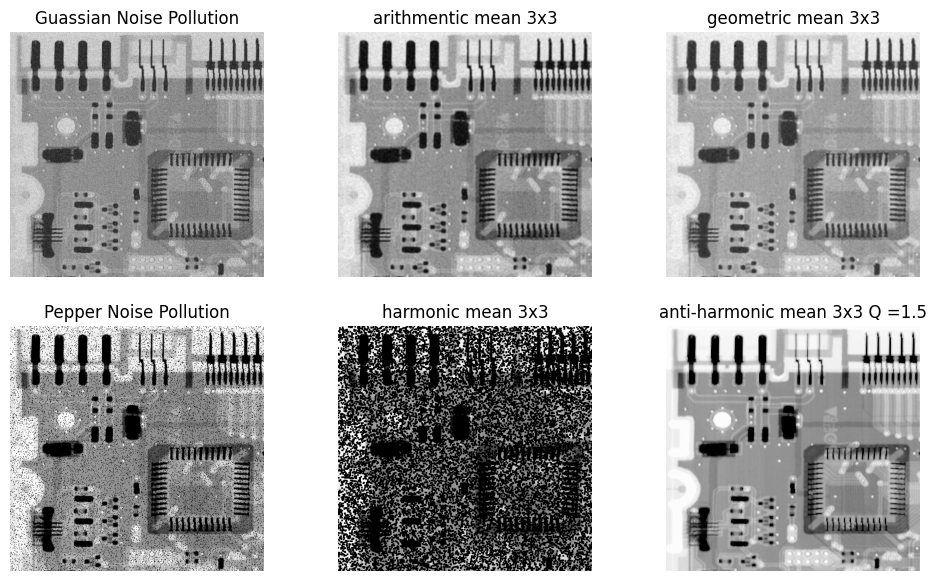

In [7]:
plt.figure(figsize=(12,7))
plt.subplot(2,3,1),plt.title('Guassian Noise Pollution'),plt.imshow(img_ori,'gray'),plt.axis('off')
plt.subplot(2,3,2),plt.title('arithmentic mean 3x3'),plt.imshow(img_am,'gray'),plt.axis('off')
plt.subplot(2,3,3),plt.title('geometric mean 3x3'),plt.imshow(img_gm,'gray'),plt.axis('off')
plt.subplot(2,3,4),plt.title('Pepper Noise Pollution'),plt.imshow(img_psn,'gray'),plt.axis('off')
plt.subplot(2,3,5),plt.title('harmonic mean 3x3'),plt.imshow(img_hm,'gray'),plt.axis('off')
plt.subplot(2,3,6),plt.title('anti-harmonic mean 3x3 Q =1.5'),plt.imshow(img_ahm,'gray'),plt.axis('off')
plt.show()

In [8]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-gaussian.tif",0)
#读入被高斯噪声污染的图像

img1 = median_filter(img_ori,(3,3))  #中值滤波
img2 = max_filter(img_ori,(3,3))  #最大值滤波
img3 = min_filter(img_ori,(3,3))  #最小值滤波
img4 = middle_filter(img_ori,(3,3))  #中点滤波
img5 = modified_alpha_filter(img_ori,(3,3),4) #修正阿尔法均值滤波

C:\Users\23282\AppData\Local\Temp\ipykernel_9256\1274588267.py:163: RuntimeWarning: overflow encountered in scalar add
  image_middle[i,j]=int((square.min()+square.max())/2)


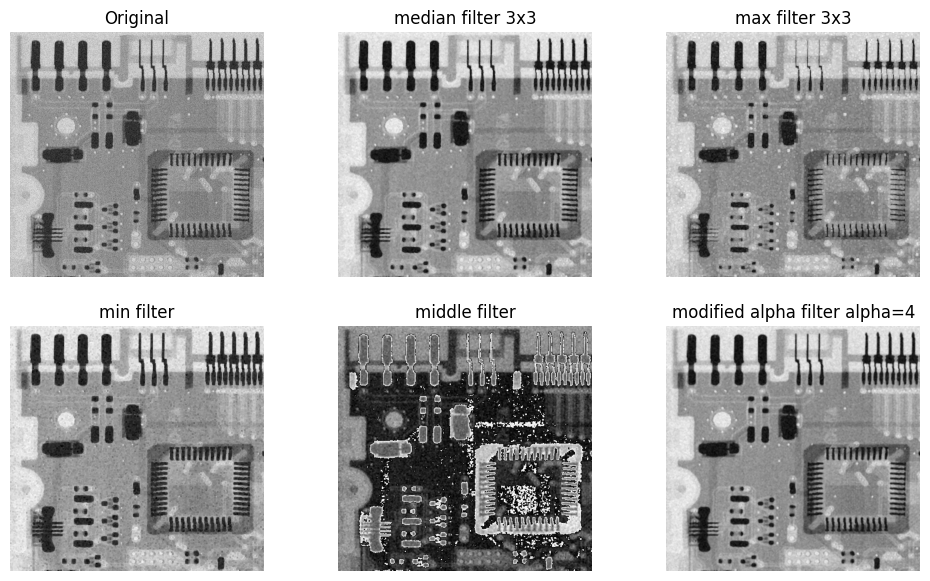

In [9]:
plt.figure(figsize=(12,7))
plt.subplot(2,3,1),plt.title('Original'),plt.imshow(img_ori,'gray'),plt.axis('off')
plt.subplot(2,3,2),plt.title('median filter 3x3'),plt.imshow(img1,'gray'),plt.axis('off')
plt.subplot(2,3,3),plt.title('max filter 3x3'),plt.imshow(img2,'gray'),plt.axis('off')
plt.subplot(2,3,4),plt.title('min filter'),plt.imshow(img3,'gray'),plt.axis('off')
plt.subplot(2,3,5),plt.title('middle filter'),plt.imshow(img4,'gray'),plt.axis('off')
plt.subplot(2,3,6),plt.title('modified alpha filter alpha=4'),plt.imshow(img5,'gray'),plt.axis('off')
plt.show()

In [10]:
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-saltandpep.tif",0)
#读入被椒盐噪声污染的图像

img1 = median_filter(img_ori,(3,3))  #1次中值滤波
img2 = median_filter(img1,(3,3))  #2次中值滤波
img3 = median_filter(img2,(3,3))  #3次中值滤波


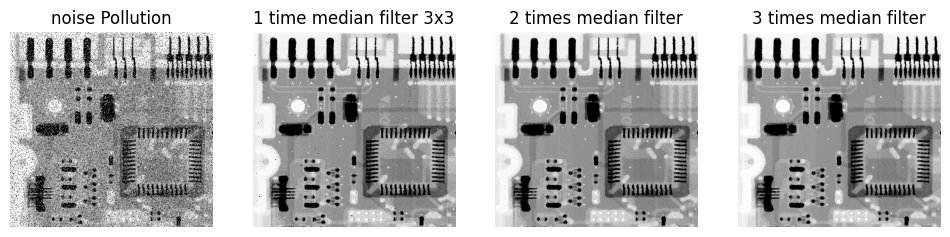

In [11]:
plt.figure(figsize=(12,7))
plt.subplot(1,4,1),plt.title('noise Pollution'),plt.imshow(img_ori,'gray'),plt.axis('off')
plt.subplot(1,4,2),plt.title('1 time median filter 3x3'),plt.imshow(img1,'gray'),plt.axis('off')
plt.subplot(1,4,3),plt.title('2 times median filter'),plt.imshow(img2,'gray'),plt.axis('off')
plt.subplot(1,4,4),plt.title('3 times median filter'),plt.imshow(img3,'gray'),plt.axis('off')
plt.show()

In [12]:
'''自适应滤波器'''
#自适应局部降噪滤波器
def adaptive_local_denoise(image,shape=(3,3),sigma_eta = 1):
    '''自适应局部降噪滤波器
    image：输入图像
    shape：滤波器核大小
    sigma_eta：噪声标准差，需通过估计得到'''
    m,n = shape[:2]
    assert m * n%2 != 0     #必须为奇数核
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_out = image.copy()
    for i in range(img_h):
        for j in range(img_w):
            square = image_pad[i:i+m,j:j+n]*1.0
            sigSxy = np.std(square.flatten())
            image_out[i,j]=image[i,j]-(((sigma_eta**2)/((sigSxy**2)+1e-8))*(image[i,j]-square.mean()))
    
    return image_out

#自适应中值滤波器
def adaptive_median_filter(image,Smin=3,Smax=7):
    '''自适应局部降噪滤波器
    Smin:Sxy邻域最小尺寸，默认3
    Smax:Sxy邻域最大尺寸，默认7
    '''
    m,n = Smax,Smax
    img_h,img_w = image.shape[:2]
    #上下填充的大小
    padding_h = int((m-1)//2)
    padding_w = int((n-1)//2)
    image_pad = np.pad(image,(padding_h,padding_w),mode = 'edge') #对图像边界进行填充
    image_out = image.copy()
    for i in range(padding_h, img_h + padding_h):
        for j in range(padding_w, img_w + padding_w):
            sxy = 3        #每一轮都重置
            k=sxy//2
            square = np.array(image_pad[i-k:i+k+1,j-k:j+k+1])
            zxy = image[i-padding_h][j-padding_w]
            zmin = square.min()
            zmax = square.max()
            zmed = np.median(square)
            #层次A
            if zmin < zmed and zmed < zmax :
                #层次B          
                if zmin < zxy and zxy < zmax:                     
                    image_out[i-padding_h,j-padding_w] = zxy
                else:
                    image_out[i-padding_h,j-padding_w] = zmed
            else:
                #增加Sxy的尺寸           
                while True:
                    sxy = sxy+1
                    k = sxy//2
                    if zmin<zmed and zmed<zmax or sxy >Smax:
                        break

                    square = np.array(image_pad[i-k:i+k+1,j-k:j+k+1])
                    zmed = np.median(square)
                    zmin = square.min()
                    zmax = square.max()
                #层次B
                if zmin < zmed and zmed < zmax or sxy > Smax:
                    if zmin < zxy < zmax:
                        image_out[i - padding_h, j - padding_w] = zxy
                    else:
                        image_out[i - padding_h, j - padding_w] = zmed
                        
    return image_out


In [13]:
'''利用算术平均滤波器和自适应局部降噪滤波器对被高斯噪声污染的图像滤波'''
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-gaussian.tif",0)
#读入被高斯噪声污染的图像

part = np.array(img_ori[2:60,55:80]) #取出一小块区域用于估计噪声的标准差
sig = np.std(part.flatten())         #估计噪声的标准差
print(sig)
img1 = arithmentic_mean(img_ori,(7,7))
img2 = adaptive_local_denoise(img_ori,(7,7),sigma_eta=sig)

13.438577387055206


(<Axes: title={'center': 'adaptive local denoise'}>,
 Text(0.5, 1.0, 'adaptive local denoise'),
 (-0.5, 463.5, 447.5, -0.5))

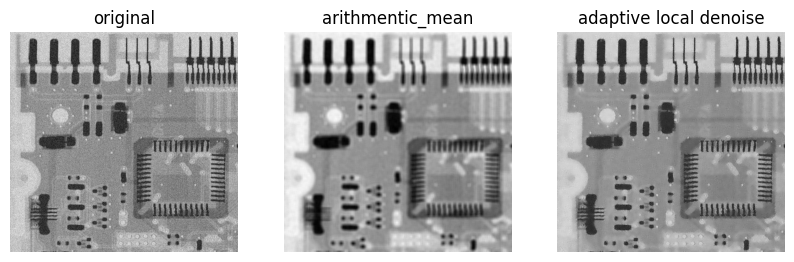

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(131),plt.title('original'),plt.imshow(img_ori,'gray'),plt.axis('off')
plt.subplot(132),plt.title('arithmentic_mean'),plt.imshow(img1,'gray'),plt.axis('off')
plt.subplot(133),plt.title('adaptive local denoise'),plt.imshow(img2,'gray'),plt.axis('off')

In [15]:
'''利用自适应中值滤波器和中值滤波器对被椒盐噪声污染的图像滤波'''
img_ori = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-saltandpep.tif",0)
#读入被椒盐噪声污染的图像

img1 = median_filter(img_ori,(7,7))
img2 = adaptive_median_filter(img_ori,Smin=3,Smax=7)


(<Axes: title={'center': 'adaptive median filter'}>,
 Text(0.5, 1.0, 'adaptive median filter'),
 (-0.5, 463.5, 447.5, -0.5))

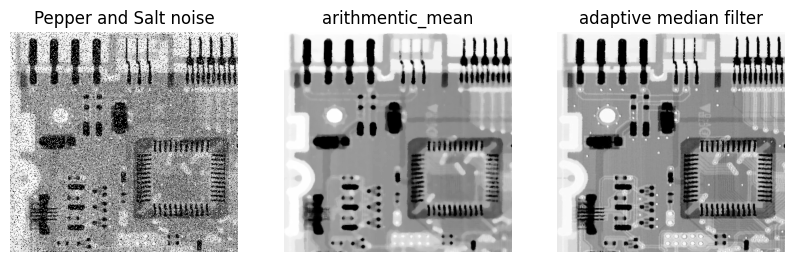

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(131),plt.title('Pepper and Salt noise'),plt.imshow(img_ori,'gray'),plt.axis('off')
plt.subplot(132),plt.title('arithmentic_mean'),plt.imshow(img1,'gray'),plt.axis('off')
plt.subplot(133),plt.title('adaptive median filter'),plt.imshow(img2,'gray'),plt.axis('off')

(824, 1000)


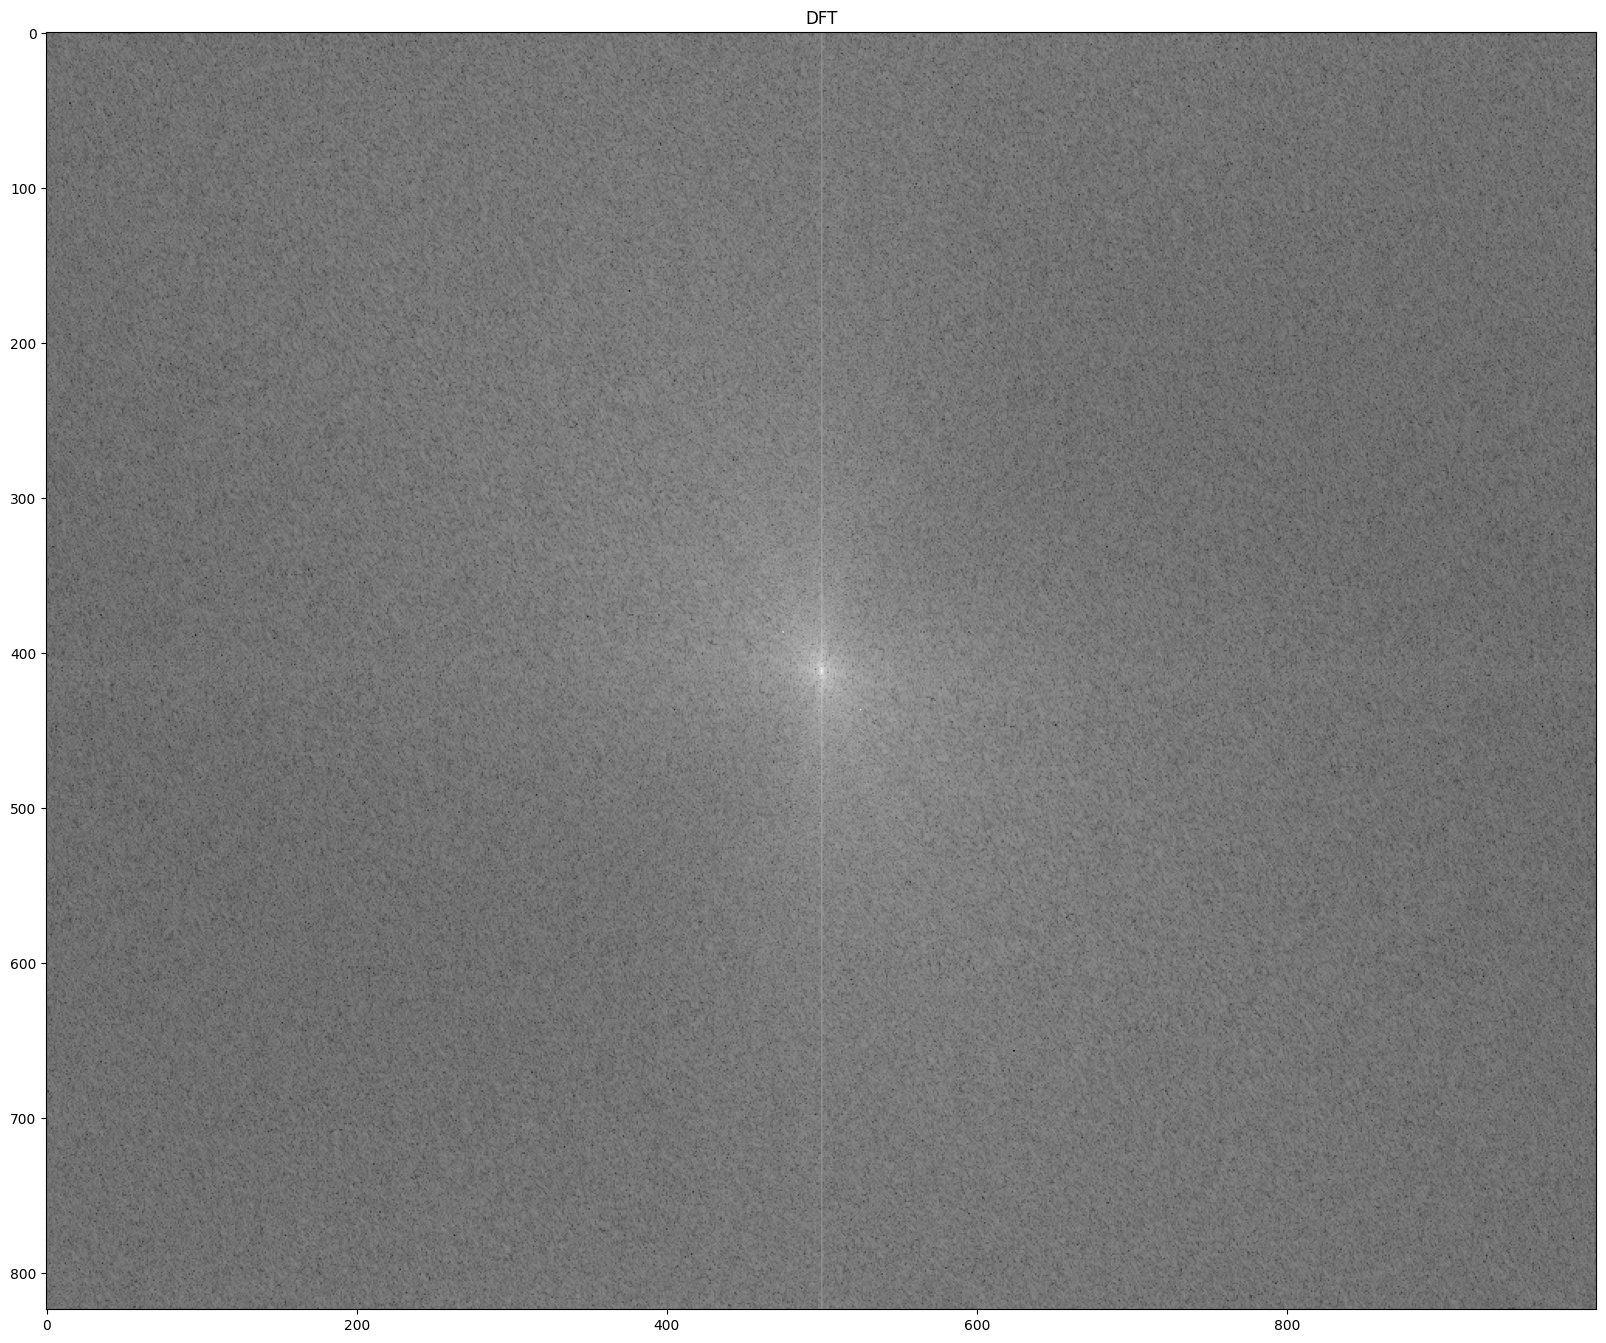

In [30]:
'''在频率域滤波降低周期噪声'''
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\astronaut-interference.tif",0)
print(img.shape)
img_dft = np.fft.fft2(img)
img_shift = np.fft.fftshift(img_dft)
img_fs = np.log(abs(img_shift))

plt.figure(figsize=(20,20))
plt.title('DFT'),plt.imshow(img_fs,'gray')
plt.show()

In [31]:
def butterworth_notch_filter(FS,s1,radius = 5,n=1):  #构建一个具有四个陷波对的巴特沃斯陷波滤波器，每个陷波区域的半径默认为5
    '''FS:输入的频谱图象
    s1为陷波对的其中一个陷波区域的坐标
    radius:半径,默认为5
    n:阶数,默认为1
    '''
    M , N = FS.shape[0],FS.shape[1]   #M行N列
    center = (M//2,N//2)   #滤波器中心为频谱图象中心
    u = np.arange(N)
    v = np.arange(M)
    u, v = np.meshgrid(u, v)
    
    #手动输入陷波对的位置
    D1 = np.sqrt((u - s1[1])**2 + (v - s1[0])**2)
    D11 = np.sqrt((u -(2*center[1] - s1[1]))**2 + (v - (2*center[0] - s1[0]))**2)   #关于中心点中心对称
    
    kernel1 = (1/(1+(radius/D1)**n))
    kernel2 = (1/(1+(radius/D11)**n))

    kernel = kernel1*kernel2
    return kernel


C:\Users\23282\AppData\Local\Temp\ipykernel_9256\288590429.py:17: RuntimeWarning: divide by zero encountered in divide
  kernel1 = (1/(1+(radius/D1)**n))
C:\Users\23282\AppData\Local\Temp\ipykernel_9256\288590429.py:18: RuntimeWarning: divide by zero encountered in divide
  kernel2 = (1/(1+(radius/D11)**n))


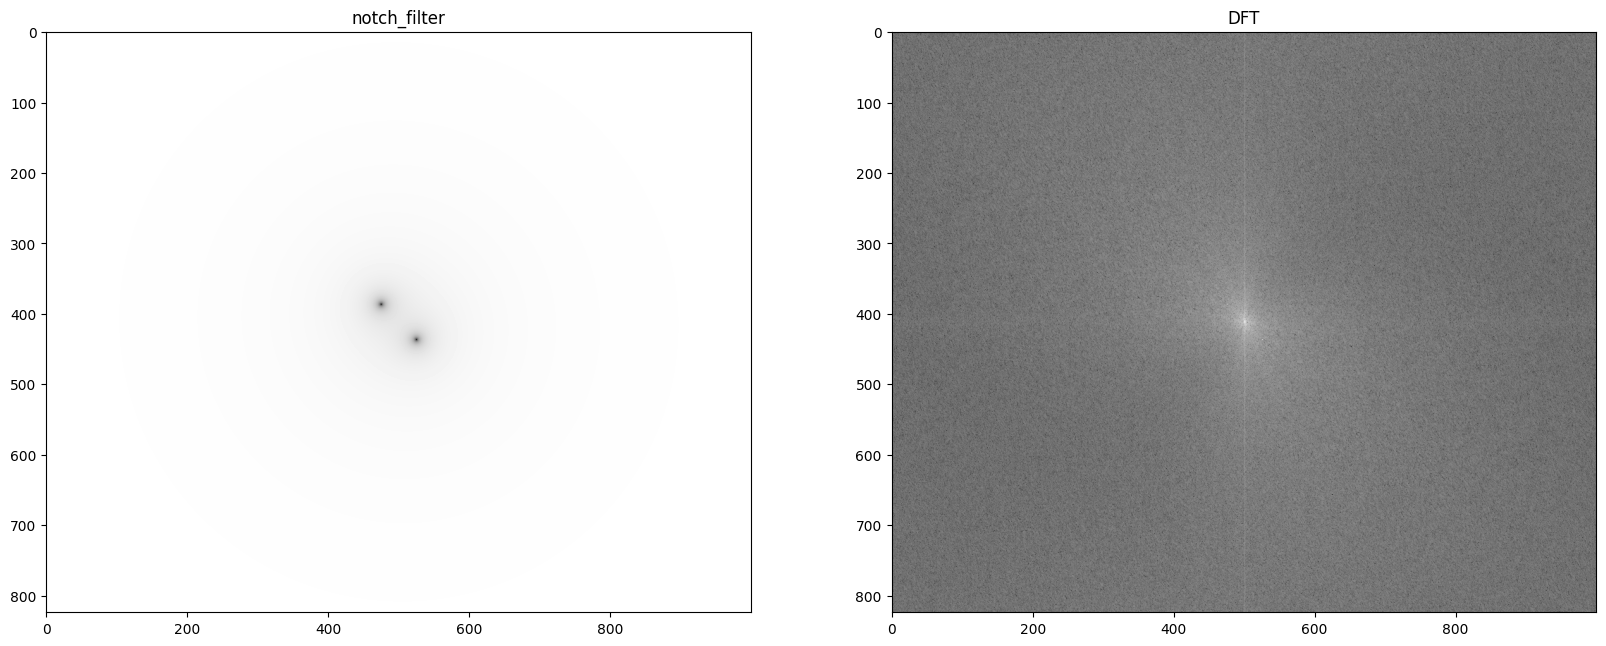

In [45]:
bnf = butterworth_notch_filter(img_fs,(387,475),radius=2,n=1)

plt.figure(figsize=(20,20))
plt.subplot(121),plt.title('notch_filter'),plt.imshow(bnf,'gray')
plt.subplot(122),plt.title('DFT'),plt.imshow(img_fs,'gray')
plt.show()

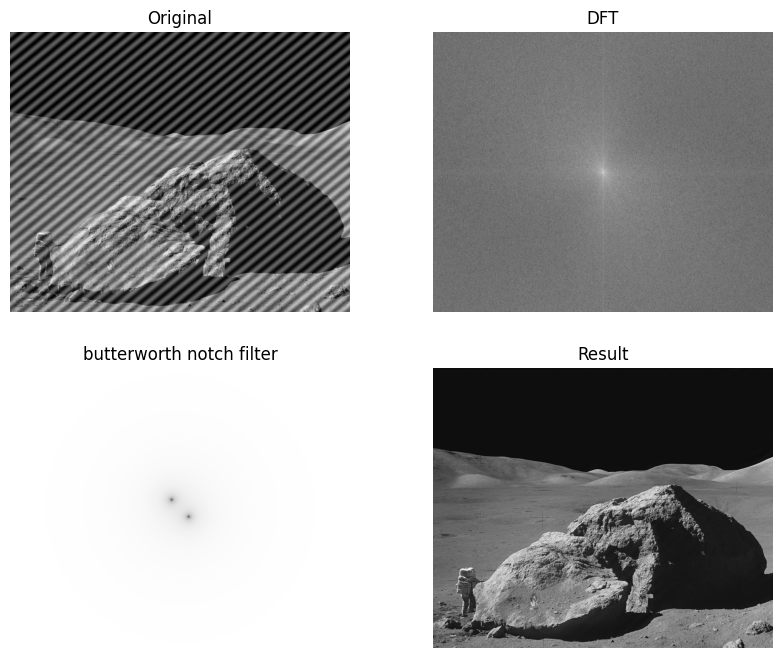

In [48]:
nf1 = bnf * img_shift

nf1 = np.fft.ifftshift(nf1)
nf1 = np.fft.ifft2(nf1)
result = np.abs(nf1)

plt.figure(figsize=(10,8))
plt.subplot(221),plt.title('Original'),plt.axis('off')
plt.imshow(img,'gray')
plt.subplot(222),plt.title('DFT'),plt.axis('off')
plt.imshow(img_fs,'gray')
plt.subplot(223),plt.title('butterworth notch filter'),plt.axis('off')
plt.imshow(bnf,'gray')
plt.subplot(224),plt.title('Result'),plt.axis('off')
plt.imshow(result,'gray')
plt.show()